In [144]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model, load_model
import seaborn as sns
import datetime
import os.path
import datetime
from importlib import reload

In [145]:
# Import self-made modules
from utils import *
from autoencoder import AutoEncoder

In [146]:
# Reload libraries when changes have been made to them
%reload_ext autoreload
%autoreload 2

In [147]:
# Set file path constants
DATA_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/'
DIAGRAM_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/'

In [191]:
# Set parameters
WIN_SIZE = 20
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)
train_type = 'Augment'

In [192]:
# Obtain test data
if train_type == 'Augment':
    test_type = 'minor'
elif train_type == 'Control':
    test_type = 'full'

In [193]:
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-patient-{test_type}-test.npy'
path = DATA_FILE_PATH + file_name
testX = np.load(path)
print(f'Number of testing samples: {testX.shape}')

Number of testing samples: (22893, 20, 3)


In [194]:
# Retrieve test data for plotting and place with pd dataframe
patient_file_path = f'/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/{test_type}-test-{WIN_SIZE}.csv'
dataframe = pd.read_csv(patient_file_path, parse_dates=['Date'])
df = dataframe.loc[:,SENSORS]
df.loc[:,'Date'] = pd.to_datetime(dataframe.loc[:,'Date'])

df.head()

,back_angle,left_angle,right_angle,Date
0,0.087420,0.553331,0.664355,2011-12-01 11:16:48.700
1,0.089552,0.557181,0.671290,2011-12-01 11:16:48.750
2,0.087420,0.561032,0.676838,2011-12-01 11:16:48.800
3,0.087420,0.564883,0.680999,2011-12-01 11:16:48.850
4,0.089552,0.568733,0.683773,2011-12-01 11:16:48.900


In [195]:
# Load the model in
# Obtain test data
if train_type == 'Augment':
    time_code = '111000_0429'
elif train_type == 'Control':
    time_code = '112000_0429'
model_file = f'{time_code}-model.h5'
model_file

'111000_0429-model.h5'

In [196]:
model = AutoEncoder(None, None, None, None, model_file, DIAGRAM_FILE_PATH)

Checking for 111000_0429-model.h5

Model loaded from: 111000_0429-model.h5
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 15)                1140      
_________________________________________________________________
dropout_20 (Dropout)         (None, 15)                0         
_________________________________________________________________
repeat_vector_10 (RepeatVect (None, 20, 15)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
dropout_21 (Dropout)         (None, 20, 15)            0         
_________________________________________________________________
time_distributed_10 (TimeDis (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048


In [197]:
# Reconstruct test signal
reconX = model.model.predict(testX)
reconX.shape

(22893, 20, 3)

In [198]:
error_types = ['MAE', 'Area', 'DTW']

In [199]:
MAE = error_computation(testX, reconX, error_types[0])
MAE_df = anomaly_df(df, WIN_SIZE, MAE, 0)

In [200]:
area_error = error_computation(testX, reconX, error_types[1])
area_df = anomaly_df(df, WIN_SIZE, area_error, 0)

In [201]:
dtw_error = error_computation(testX, reconX, error_types[2])
dtw_df = anomaly_df(df, WIN_SIZE, dtw_error, 0)

1000/22893
2000/22893
3000/22893
4000/22893
5000/22893
6000/22893
7000/22893
8000/22893
9000/22893
10000/22893
11000/22893
12000/22893
13000/22893
14000/22893
15000/22893
16000/22893
17000/22893
18000/22893
19000/22893
20000/22893
21000/22893
22000/22893


In [202]:
start = MAE_df['Date'].iloc[0]
end = MAE_df['Date'].iloc[-1]

In [203]:
dfs = [MAE_df, area_df, dtw_df]

In [204]:
errors = [MAE, area_error, dtw_error]

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/types-error-W=20, Train=Augment-1.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

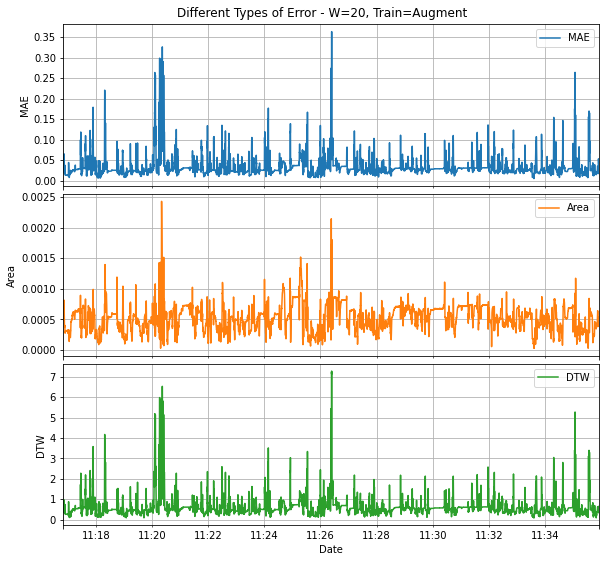

In [205]:
multiple_error_plot_and_save(dfs, error_types, f'W={WIN_SIZE}, Train={train_type}', DIAGRAM_FILE_PATH, save_new=True)

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/hist-types-error-W=20, Train=Augment-4.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

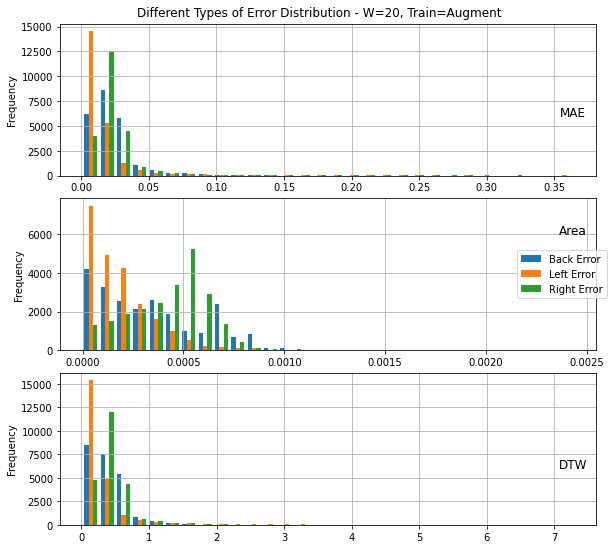

In [211]:
multiple_error_hist_plot_and_save(errors, error_types, f'W={WIN_SIZE}, Train={train_type}', DIAGRAM_FILE_PATH, save_new=True)